Attrition Analysis in Healthcare Workers

    1. 250-500-word narrative

The healthcare field is currently in a major worker shortage crisis. This is true at every level. I currently work in a hospital pathology lab, and we are struggling to find help. We have had positions open for months now with little to no interest or unqualified applicants. This problem needs to be addressed in two ways. First, spread a wider net to get applications. Second, make sure your current employes stay in order not to make the situation worse. I will be focusing on the later problem for this project. The data set I found is looking at nursing employee demographics and whether those employees have had attrition or not. Because my immediate colleagues are not nurses, I will be looking to develop an analysis/model that can be more general from the dataset. This will help me predict if any of my colleagues may be reaching that attrition level and may be close to resignation. I believe the dataset I found will be a better model for my purposes than just general employee attrition data because there are some added emotional strings to healthcare work. Healthcare workers may not quit as soon as other industries because they feel as though they need to work through it for the patients. “We are here for the patients” is a term I hear a lot. This idea may skew the quitting rates when compared to the general labor market. There are some variables I am missing from this dataset that I will try to look for elsewhere. For example, I work with both union and non-union employees. This dataset doesn’t have any information on that but would be something I am interested in looking at when compared to attrition rates.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
workers = pd.read_csv('watson_healthcare_modified.csv')

In [3]:
pd.options.display.max_columns = 500
workers.head(15)

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,Male,61,2,2,Other,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,Female,56,3,1,Other,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,1633361,32,No,Travel_Frequently,1005,Maternity,2,2,Life Sciences,1,4,Male,79,3,1,Nurse,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,1329390,59,No,Travel_Rarely,1324,Maternity,3,3,Medical,1,3,Female,81,4,1,Nurse,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,1699288,30,No,Travel_Rarely,1358,Maternity,24,1,Life Sciences,1,4,Male,67,3,1,Nurse,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,1469740,38,No,Travel_Frequently,216,Maternity,23,3,Life Sciences,1,4,Male,44,2,3,Therapist,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,1101291,36,No,Travel_Rarely,1299,Maternity,27,3,Medical,1,3,Male,94,3,2,Nurse,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [4]:
workers['Attrition'] = workers['Attrition'].replace('No', 0)
workers['Attrition'] = workers['Attrition'].replace('Yes', 1)
workers.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1200302,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,Male,61,2,2,Other,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1060315,37,1,Travel_Rarely,1373,Maternity,2,2,Other,1,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1272912,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,Female,56,3,1,Other,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,1414939,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


    2. First Visual

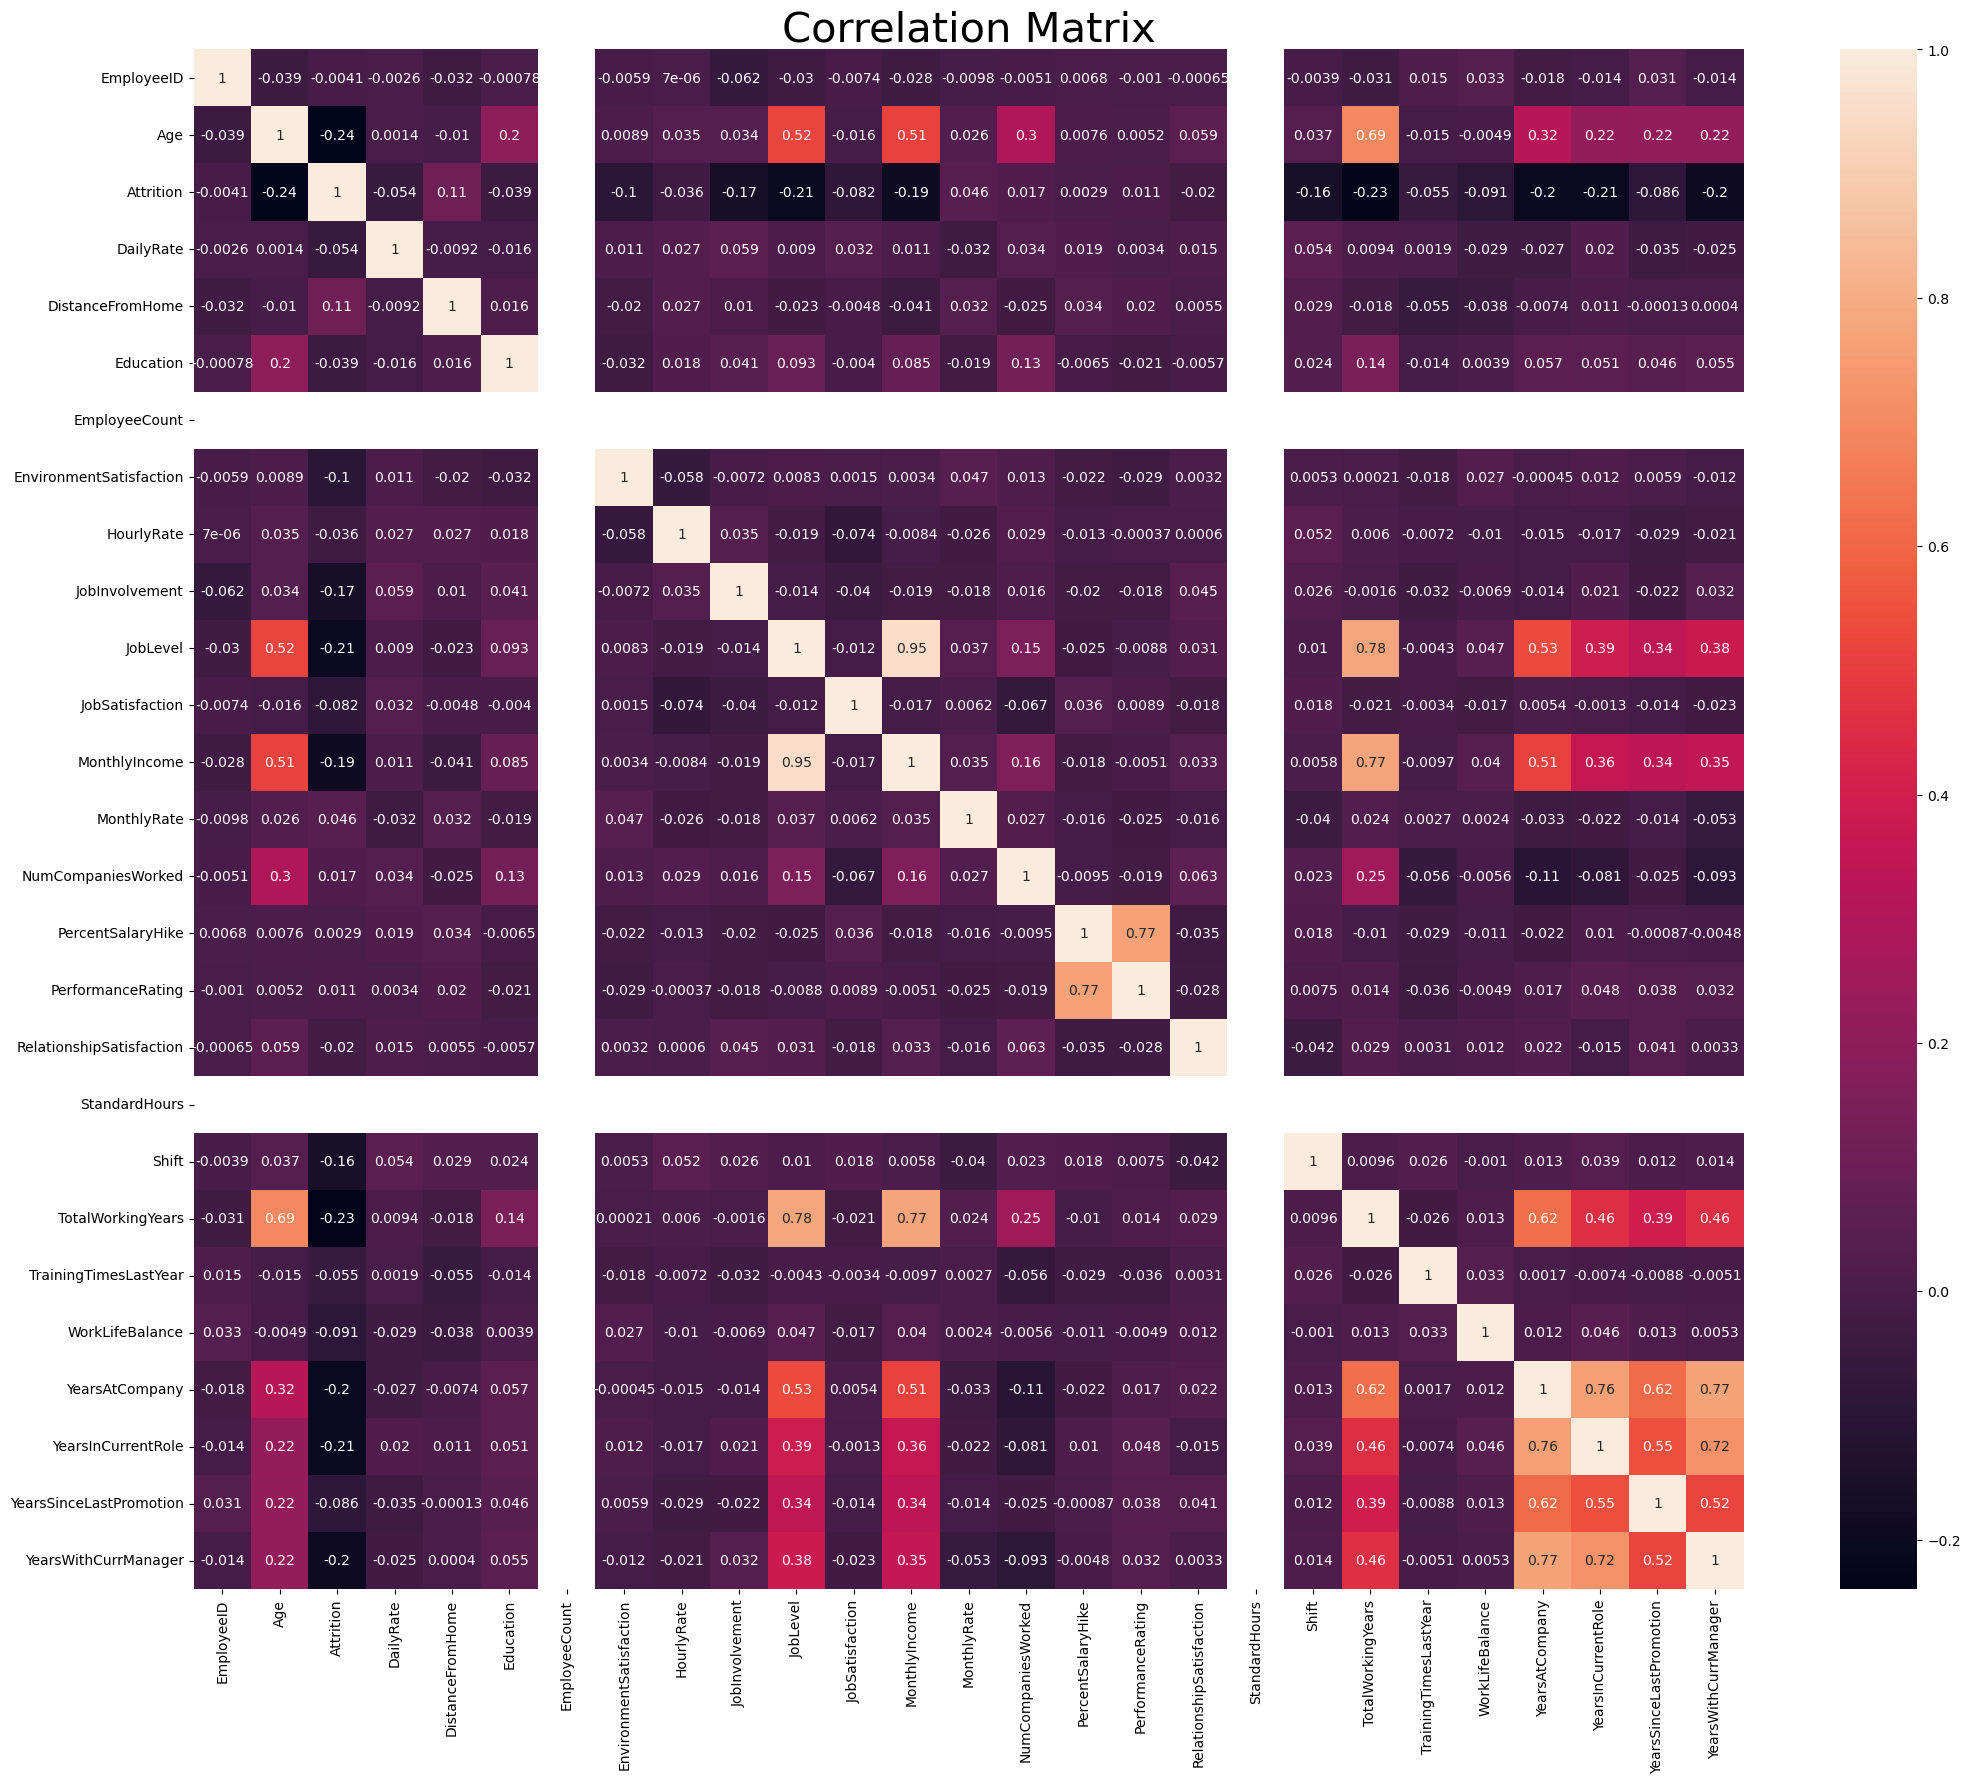

In [5]:
corr_matrix = workers.corr()
plt.figure(figsize=(25,20))
plt.title('Correlation Matrix', size=30)
sns.heatmap(corr_matrix, annot=True)
plt.show()

Unfortunately, no strong initial correlations between attrition and any of the other variables. There are some weak negative correlations. 

    3. Second visualization.

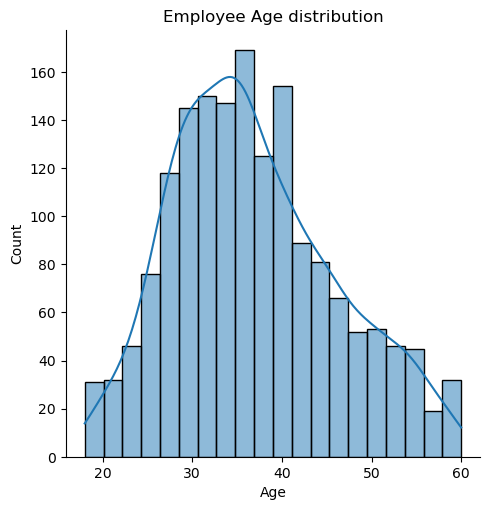

In [6]:
sns.displot(workers["Age"], kde=True)
plt.title("Employee Age distribution")
plt.show()

The employees from this data are mainly in their late 20's to early 40's.

    4. Third visualization.

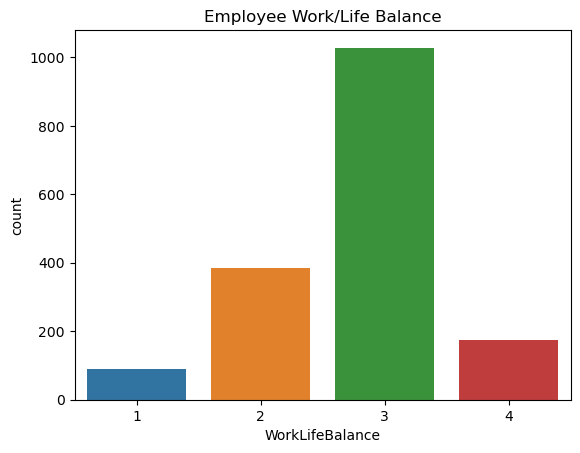

In [7]:
sns.countplot(workers["WorkLifeBalance"])
plt.title("Employee Work/Life Balance")
plt.show()

It is common knowledge that poor work/life balance can lead to burnout. There are few employees in this dataset that say they have poor work/life balance.

    5. Fourth Visualization.

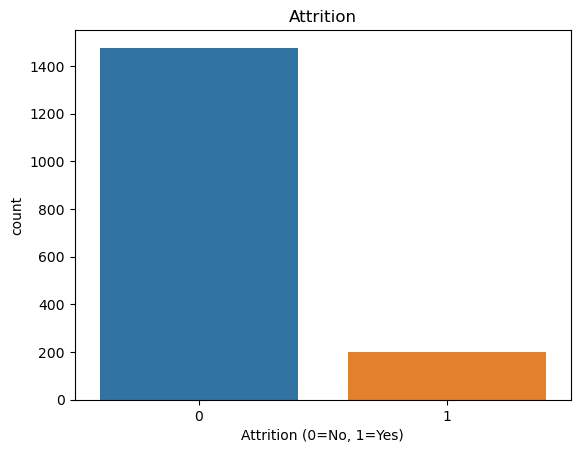

In [8]:
sns.countplot(workers["Attrition"])
plt.xlabel('Attrition (0=No, 1=Yes)')
plt.title("Attrition")
plt.show()

There are few employees reporting attrition in this dataset. 

    6. Fifth visualization.

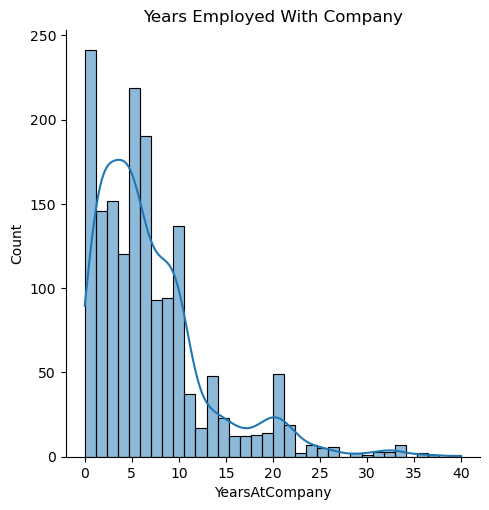

In [9]:
sns.displot(workers["YearsAtCompany"], kde=True)
plt.title("Years Employed With Company")
plt.show()

These employees are, on average, fairly new to the company.

I wanted to do my initial visualizations with the data in its original form. I felt this would help me understand where I needed to go with the data and what I may learn from it before making a bunch of changes or adding things. The correlation matrix unfortunately showed little correlation with the target variable (attrition). This could be due to how the data is represented for the other variables. My other visualizations were used to look into other reasons why there may be little correlation. One visual was just looking at the count of those reporting attrition. The count isn't that high compared to those reporting no attrition. Most of the employees are younger and have not been with the company that long. This could factor into the low attrition reporting (they haven't had the time to get to that point yet with this company). There also seems to be a good work/life balance for these employees. It would be interesting to compare this dataset with one that had the opposite representation (older workers, with the company a long time, and low work life balance).

*****

DSC550 - Project Milestone 2

Date: 5/7/2023

In [10]:
for col in workers.columns:
    print(col)

EmployeeID
Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
Shift
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [11]:
workers = workers.drop(labels=['EmployeeID', 'BusinessTravel', 'EmployeeCount', 'Department', 'Over18', 
                                'StandardHours', 'TrainingTimesLastYear', 'JobLevel', 'JobRole'], axis=1)
workers.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,1102,1,2,Life Sciences,2,Female,94,3,4,Single,5993,19479,8,Yes,11,3,1,0,8,1,6,4,0,5
1,49,0,279,8,1,Life Sciences,3,Male,61,2,2,Married,5130,24907,1,No,23,4,4,1,10,3,10,7,1,7
2,37,1,1373,2,2,Other,4,Male,92,2,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,0,0,0,0
3,33,0,1392,3,4,Life Sciences,4,Female,56,3,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,8,7,3,0
4,27,0,591,2,1,Medical,1,Male,40,3,2,Married,3468,16632,9,No,12,3,4,1,6,3,2,2,2,2


    1. My first change was to drop some of the columns. EmployeeID, EmployeeCount, Over18, StandardHours and TrainingTimesLastYear are all either filled with the same value or redundant. BusinessTravel, Department, JobLevel, and JobRole are not applicable to how I am trying to generalize this data model.

In [12]:
workers['Education'].value_counts()

3    655
4    447
2    322
1    196
5     56
Name: Education, dtype: int64

In [13]:
workers['EducationField'].value_counts()

Life Sciences       697
Medical             524
Marketing           189
Technical Degree    149
Other                88
Human Resources      29
Name: EducationField, dtype: int64

In [14]:
workers['EducationField'] = workers['EducationField'].replace(['Life Sciences', 'Medical', 'Marketing', 'Other',
                                                             'Human Resources'],'College Degree') 

In [15]:
workers['EducationField'].value_counts()

College Degree      1527
Technical Degree     149
Name: EducationField, dtype: int64

    2. My second change is to alter the EducationField column. In my workplace, the only distinction between workers is having a technical degree versus having a four year college degree. Because of that, I decided to condense all the values besides Technical into one value, "College Degree". I am however going to leave the Education column as is.

In [16]:
cat_var = workers.select_dtypes(include=object)
cat_var.head()

,EducationField,Gender,MaritalStatus,OverTime
0,College Degree,Female,Single,Yes
1,College Degree,Male,Married,No
2,College Degree,Male,Single,Yes
3,College Degree,Female,Married,Yes
4,College Degree,Male,Married,No


In [17]:
for col in cat_var.columns:
    dummies=pd.get_dummies(cat_var)

In [18]:
dummies.head()

,EducationField_College Degree,EducationField_Technical Degree,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,0,1,0,0,0,1,0,1
1,1,0,0,1,0,1,0,1,0
2,1,0,0,1,0,0,1,0,1
3,1,0,1,0,0,1,0,0,1
4,1,0,0,1,0,1,0,1,0


In [19]:
workers = pd.concat([workers, dummies], axis=1)
workers = workers.drop(['EducationField', 'Gender', 'MaritalStatus', 'OverTime', 'EducationField_Technical Degree', 
                       'Gender_Female', 'OverTime_No'], axis=1)
workers = workers.rename(columns={'EducationField_College Degree':'EducationField', 'Gender_Male':'Gender', 
                                 'OverTime_Yes':'OverTime'})
workers.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationField,Gender,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime
0,41,0,1102,1,2,2,94,3,4,5993,19479,8,11,3,1,0,8,1,6,4,0,5,1,0,0,0,1,1
1,49,0,279,8,1,3,61,2,2,5130,24907,1,23,4,4,1,10,3,10,7,1,7,1,1,0,1,0,0
2,37,1,1373,2,2,4,92,2,3,2090,2396,6,15,3,2,0,7,3,0,0,0,0,1,1,0,0,1,1
3,33,0,1392,3,4,4,56,3,3,2909,23159,1,11,3,3,0,8,3,8,7,3,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,2,3468,16632,9,12,3,4,1,6,3,2,2,2,2,1,1,0,1,0,0


    3. My third change is to create binary variables out of EducationField, Gender, and OverTime variables and to create dummie variables out of the MaritalStatus column.

In [20]:
from sklearn.model_selection import train_test_split
y = workers['Attrition']
X = workers.drop('Attrition', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [21]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)
print(f'''Shape of X before SMOTE: {X_train.shape}
Shape of X after SMOTE: {X_sm.shape}''')
print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (1340, 27)
Shape of X after SMOTE: (2376, 27)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Attrition, dtype: float64

    4. My last change for this milestone is splitting the data into my target and features. I took the suggestion of using SMOTE to mitigate the imbalanced target variable. I plan to run models based on the original X,y target and features and the X,y after applying SMOTE in order to see what difference it makes. 

*****

DSC550 - Project Milestone 3

Date: 5/21/2023

Note: I fixed the SMOTE resampling to be used just on the training set from the last milestone.

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
pipe = Pipeline([('Standard', scaler), ('classifier', knn)])
search_space = [{'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
                {'classifier': [LogisticRegression()],
                'classifier__penalty': ['l1', 'l2'],
                'classifier__C': np.logspace(0, 4, 10),
                'classifier__solver': ['liblinear']},
                {'classifier': [RandomForestClassifier()],
                'classifier__n_estimators': [10, 100, 1000],
                'classifier__max_features': [1, 2, 3]},
                {'classifier': [LinearRegression()]}]
classifier = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(X_sm, y_sm)

In [23]:
classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('Standard', StandardScaler()),
  ('classifier', KNeighborsClassifier(n_jobs=-1, n_neighbors=2))],
 'verbose': False,
 'Standard': StandardScaler(),
 'classifier': KNeighborsClassifier(n_jobs=-1, n_neighbors=2),
 'Standard__copy': True,
 'Standard__with_mean': True,
 'Standard__with_std': True,
 'classifier__algorithm': 'auto',
 'classifier__leaf_size': 30,
 'classifier__metric': 'minkowski',
 'classifier__metric_params': None,
 'classifier__n_jobs': -1,
 'classifier__n_neighbors': 2,
 'classifier__p': 2,
 'classifier__weights': 'uniform'}

In [24]:
y_pred = classifier.predict(X_sm)
y_pred_test = classifier.predict(X_test)
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

Accuracy:
TEST: 0.875


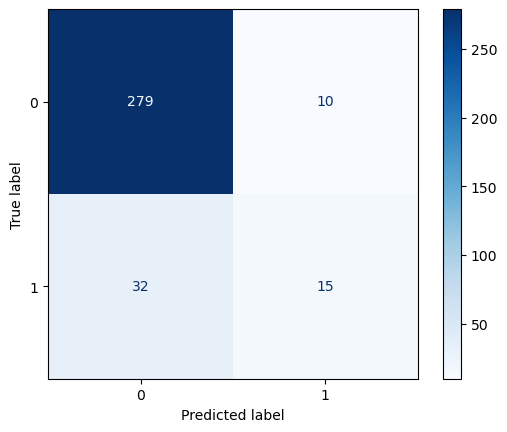

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test,cmap='Blues')

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))
#end of testing with SMOTE

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       289
           1       0.60      0.32      0.42        47

    accuracy                           0.88       336
   macro avg       0.75      0.64      0.67       336
weighted avg       0.86      0.88      0.86       336



In [27]:
classifier = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(X_train, y_train)
classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('Standard', StandardScaler()),
  ('classifier',
   LogisticRegression(C=2.7825594022071245, penalty='l1', solver='liblinear'))],
 'verbose': False,
 'Standard': StandardScaler(),
 'classifier': LogisticRegression(C=2.7825594022071245, penalty='l1', solver='liblinear'),
 'Standard__copy': True,
 'Standard__with_mean': True,
 'Standard__with_std': True,
 'classifier__C': 2.7825594022071245,
 'classifier__class_weight': None,
 'classifier__dual': False,
 'classifier__fit_intercept': True,
 'classifier__intercept_scaling': 1,
 'classifier__l1_ratio': None,
 'classifier__max_iter': 100,
 'classifier__multi_class': 'auto',
 'classifier__n_jobs': None,
 'classifier__penalty': 'l1',
 'classifier__random_state': None,
 'classifier__solver': 'liblinear',
 'classifier__tol': 0.0001,
 'classifier__verbose': 0,
 'classifier__warm_start': False}

In [28]:
y_pred = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

Accuracy:
TEST: 0.9434523809523809


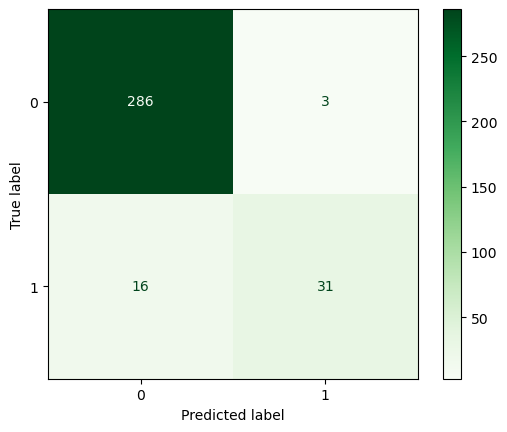

In [29]:
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test,cmap='Greens')

In [30]:
print(classification_report(y_test,y_pred_test))
#retesting without SMOTE

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       289
           1       0.91      0.66      0.77        47

    accuracy                           0.94       336
   macro avg       0.93      0.82      0.87       336
weighted avg       0.94      0.94      0.94       336



In [31]:
classifier = LogisticRegression(solver='liblinear', max_iter=100)
smo = classifier.fit(X_sm, y_sm)

In [32]:
y_pred = smo.predict(X_sm)
y_pred_test = smo.predict(X_test)
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

Accuracy:
TEST: 0.9017857142857143


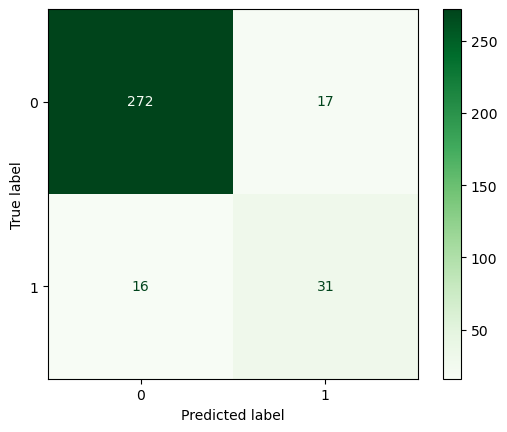

In [33]:
ConfusionMatrixDisplay.from_estimator(smo, X_test, y_test,cmap='Greens')

In [34]:
print(classification_report(y_test,y_pred_test))
#logistic regression on SMOTE data

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       289
           1       0.65      0.66      0.65        47

    accuracy                           0.90       336
   macro avg       0.80      0.80      0.80       336
weighted avg       0.90      0.90      0.90       336



My first idea was to run a bunch of models through the dataset and see which GridSearchCV found to be the best. It found a KNN classifier to be best for the SMOTE data and a logistic regression model to be best for the data unchanged with SMOTE. The KNN model for the SMOTE data had a high rate of false negative predictions and a low rate of true positives as compared to the other models. I then wanted to compare a logistic regression model for the SMOTE data with the logit model for the unchanged data. SMOTE resulted in increasing the number of false positives for the data. The question then becomes 'are more false positives better or more false negatives?' I think because we are looking for attrition data, more positives (either true or false) means the better model. This would likely lead to implementing measures to decrease attrition sooner versus later. This means more employees would be kept in the long run. Costs would then be saved on training and overtime for the employees that remain.